In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9735,AGGCTAACGCCTTTATTATATAACCACTCTTAGCCCATAGGACTAC...,AGGCTAACGCCTTTATTATATAACCACTCTTAGCCCATAGGACTAC...
9736,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9737,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9738,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 9740/9740 [00:00<00:00, 94826.57it/s]


[72, 66, 82, 102, 102, 128, 132, 131, 152, 150, 171, 175, 197, 201, 217, 229, 234, 254, 263, 262, 285, 280, 314, 318, 311, 329, 359, 332, 355, 371, 387, 395, 407, 423, 436, 434, 447, 437, 482, 464, 484, 493, 508, 506, 511, 512, 541, 526, 545, 549, 577, 550, 571, 590, 604, 599, 590, 634, 636, 623, 636, 659, 642, 659, 705, 705, 689, 679, 730, 703, 682, 725, 717, 729, 742, 730, 736, 755, 764, 748, 754, 725, 764, 748, 788, 778, 768, 773, 799, 780, 785, 796, 811, 783, 792, 818, 796, 805, 835, 796, 837, 830, 847, 802, 852, 823, 808, 780, 728, 90]


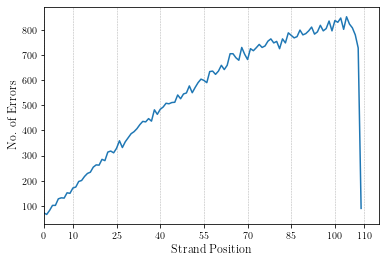

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-iter-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 9740/9740 [00:01<00:00, 5276.23it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


CT ->  6
T -> A 6
G -> C 6
 -> TC 7
AA ->  9
TT ->  9
TC ->  9
C -> A 9
CC -> T 11
CC ->  32
A -> G 32
GG ->  50
C -> T 133
 -> A 137
 -> G 145
 -> C 156
T -> C 171
G -> A 172
A ->  174
 -> T 196
T ->  206
G ->  525
C ->  534


C ->  @ 78 6
G ->  @ 86 6
G ->  @ 92 6
G ->  @ 70 6
G ->  @ 89 6
G ->  @ 62 6
C ->  @ 65 6
 -> T @ 110 6
G ->  @ 60 6
C ->  @ 69 6
G ->  @ 76 6
C ->  @ 67 6
C ->  @ 91 6
C ->  @ 27 6
G ->  @ 100 6
C ->  @ 43 6
T -> C @ 106 6
G ->  @ 51 6
C ->  @ 46 6
C ->  @ 10 6
C -> T @ 2 6
C ->  @ 20 6
C ->  @ 25 6
C ->  @ 99 6
C ->  @ 48 6
C ->  @ 98 6
C ->  @ 96 6
C ->  @ 110 6
C ->  @ 84 6
G ->  @ 29 6
G ->  @ 47 6
C ->  @ 38 6
G ->  @ 41 6
C ->  @ 5 6
G ->  @ 27 7
C ->  @ 75 7
G ->  @ 82 7
G ->  @ 80 7
 -> TC @ 0 7
C ->  @ 19 7
C ->  @ 102 7
C ->  @ 30 7
G ->  @ 75 7
G ->  @ 93 7
A ->  @ 110 7
G ->  @ 2 7
G ->  @ 22 7
G ->  @ 66 7
G ->  @ 8 7
C ->  @ 95 8
C ->  @ 41 8
C ->  @ 13 8
G -> A @ 110 8
C ->  @ 58 8
G ->  @ 17 8
G ->  @ 1 8
C ->  @ 105 8
G ->  @ 45 8
G ->  @ 61 8
G ->  @ 43 8
G ->  @ 37 8
C ->  @ 76 8
C ->  @ 11 8
C ->  @ 59 9
C ->  @ 45 9
G ->  @ 12 9
C ->  @ 103 9
C ->  @ 73 9
C ->  @ 62 11
C ->  @ 42 11
GG ->  @ 110 11
C -> T @ 1 11
 -> A @ 110 14
 -> C @ 0 21
 -> T @ 0 31
C ->  @ 1 

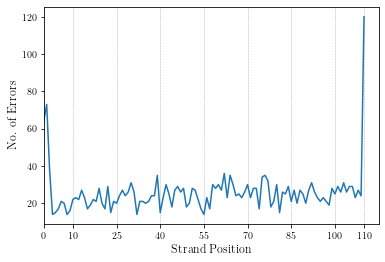

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-iter-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 32, 4, 3, 2, 6, 3, 4, 2, 1, 6, 8, 3, 8, 4, 4, 2, 3, 5, 7, 6, 5, 3, 0, 4, 6, 3, 6, 3, 3, 7, 3, 2, 3, 3, 3, 4, 2, 6, 5, 5, 8, 11, 6, 3, 9, 6, 4, 6, 3, 1, 3, 5, 5, 3, 0, 4, 2, 8, 9, 4, 2, 11, 2, 5, 6, 5, 6, 5, 6, 3, 4, 5, 9, 5, 7, 8, 5, 6, 3, 3, 2, 2, 4, 6, 4, 3, 4, 5, 3, 2, 6, 4, 5, 4, 8, 6, 3, 6, 6, 5, 4, 7, 9, 4, 8, 3, 5, 2, 3, 6]
[0, 8, 7, 2, 3, 1, 5, 4, 7, 2, 3, 2, 9, 2, 5, 2, 5, 8, 0, 3, 3, 4, 7, 2, 5, 3, 4, 7, 2, 6, 5, 4, 2, 3, 1, 3, 3, 8, 1, 5, 2, 6, 4, 8, 4, 8, 4, 6, 4, 3, 4, 6, 5, 3, 3, 2, 1, 4, 4, 5, 6, 8, 6, 5, 4, 5, 7, 5, 4, 4, 6, 4, 5, 5, 2, 7, 6, 5, 2, 1, 7, 4, 7, 4, 5, 2, 6, 4, 4, 6, 3, 5, 6, 7, 3, 3, 5, 5, 5, 5, 6, 3, 3, 2, 5, 4, 3, 3, 5, 4, 52]
[0, 5, 2, 0, 2, 1, 1, 1, 0, 0, 0, 3, 1, 0, 3, 2, 0, 1, 0, 0, 4, 2, 0, 4, 2, 1, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1, 0, 4, 2, 0, 2, 4, 2, 1, 2, 1, 1, 2, 4, 1, 3, 4, 3, 2, 1, 2, 2, 2, 3, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 3, 3, 1, 3, 3, 4, 4, 1, 1, 3, 1, 3, 2, 0, 3, 4, 2, 2, 3, 3, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 4, 2, 3, 0, 2, 1, 1, 3, 

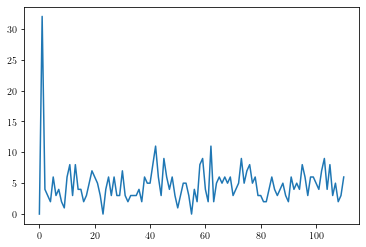

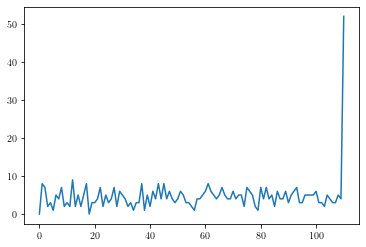

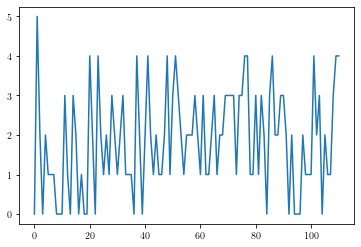

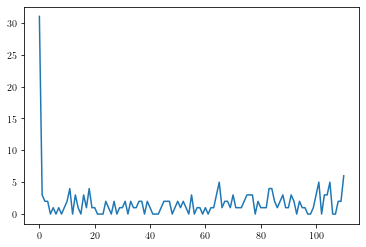

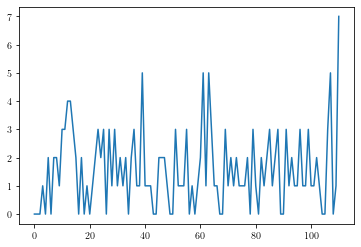

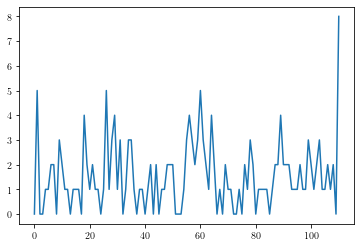

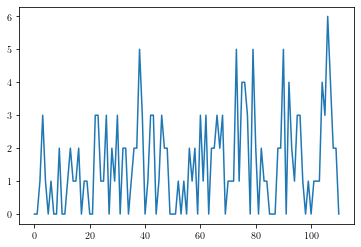

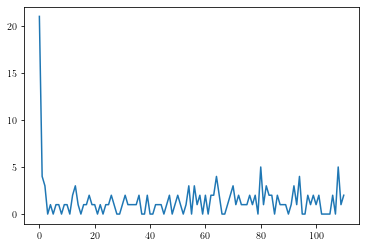

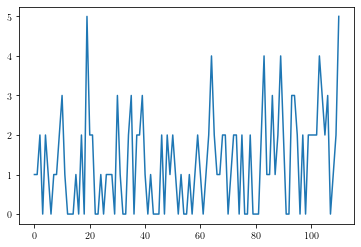

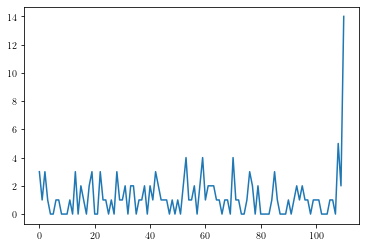

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)